In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
df = pd.read_csv("credit_dataset.csv")

print(df.head())
print("\nApproved sınıf dağılımı:")
print(df['approved'].value_counts())


   age  income   debt  credit_score  employment_years  is_homeowner  \
0   56   20778  47829           489                 4             0   
1   46   15473  30750           687                27             1   
2   32   12461  10576           728                38             1   
3   60   24116  16566           583                19             0   
4   25   23098   7190           536                23             1   

  education_level  is_married  previous_loans  approved  
0          Master           0               0         0  
1        Bachelor           1               7         1  
2     High School           0               8         1  
3        Bachelor           0               0         1  
4     High School           0               7         1  

Approved sınıf dağılımı:
approved
1    1316
0     684
Name: count, dtype: int64


## Gelire göre onay oranı


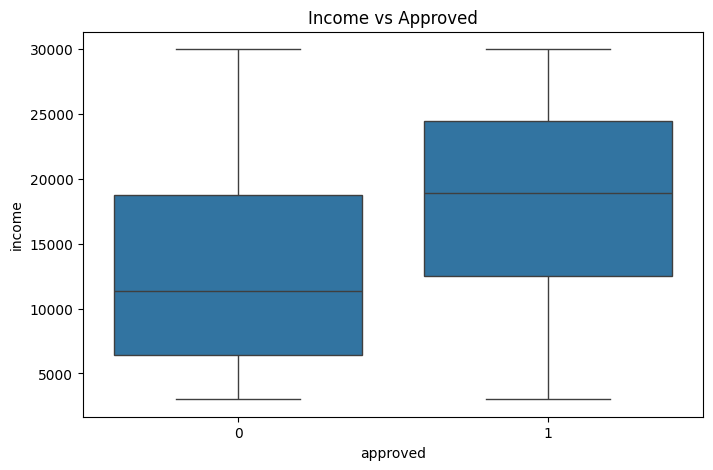

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="approved", y="income", data=df)
plt.title("Income vs Approved")
plt.show()

## credit_score ile approved arasındaki ilişki (kutu grafiği)


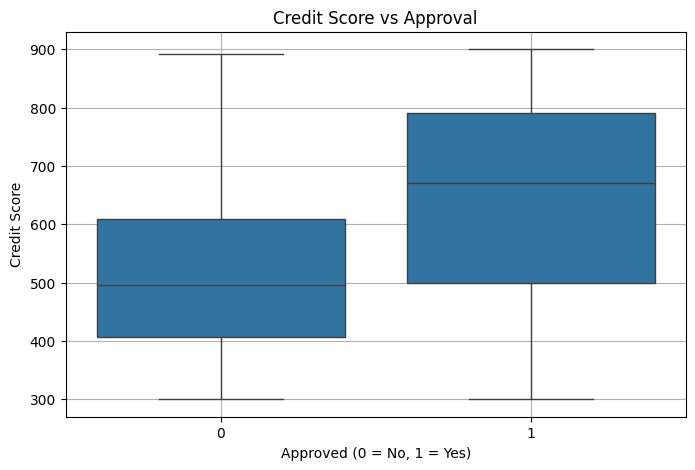

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x="approved", y="credit_score", data=df)
plt.title("Credit Score vs Approval")
plt.xlabel("Approved (0 = No, 1 = Yes)")
plt.ylabel("Credit Score")
plt.grid(True)
plt.show()


## debt'e göre onay oranı (violin plot)

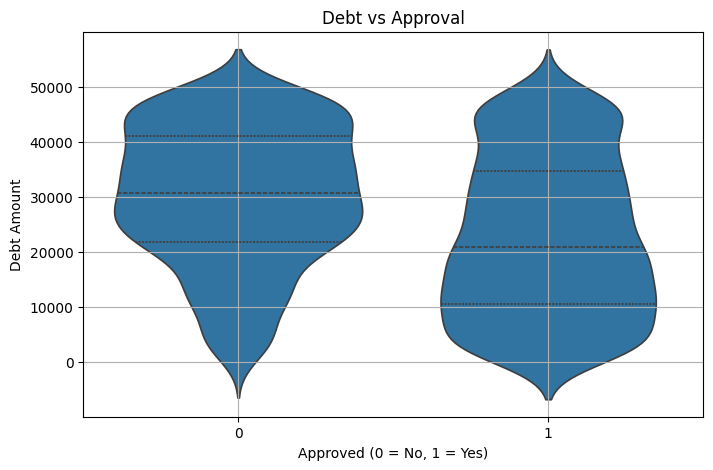

In [17]:
plt.figure(figsize=(8,5))
sns.violinplot(x="approved", y="debt", data=df, inner="quart")
plt.title("Debt vs Approval")
plt.xlabel("Approved (0 = No, 1 = Yes)")
plt.ylabel("Debt Amount")
plt.grid(True)
plt.show()


## Eğitim seviyesi ve onay oranı (% olarak stacked bar plot)

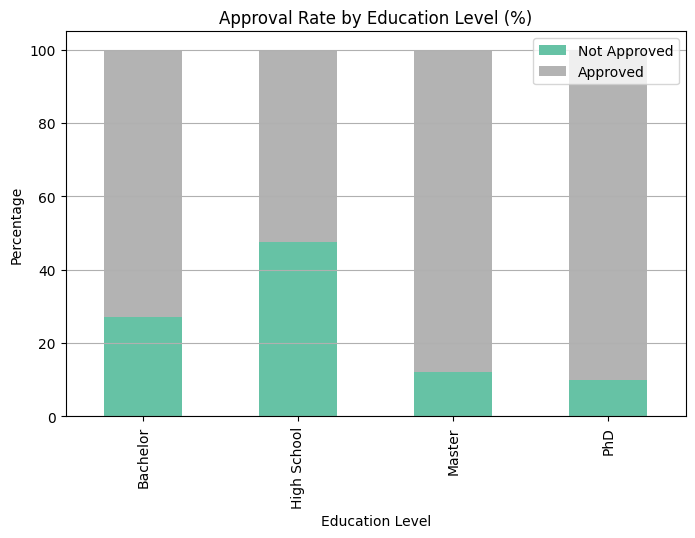

In [18]:
edu_approval = pd.crosstab(df["education_level"], df["approved"], normalize='index') * 100
edu_approval.plot(kind="bar", stacked=True, figsize=(8,5), colormap="Set2")
plt.title("Approval Rate by Education Level (%)")
plt.ylabel("Percentage")
plt.xlabel("Education Level")
plt.legend(["Not Approved", "Approved"], loc='upper right')
plt.grid(axis='y')
plt.show()


## Isı Haritası: Sayısal özellikler ve hedef değişken korelasyonu

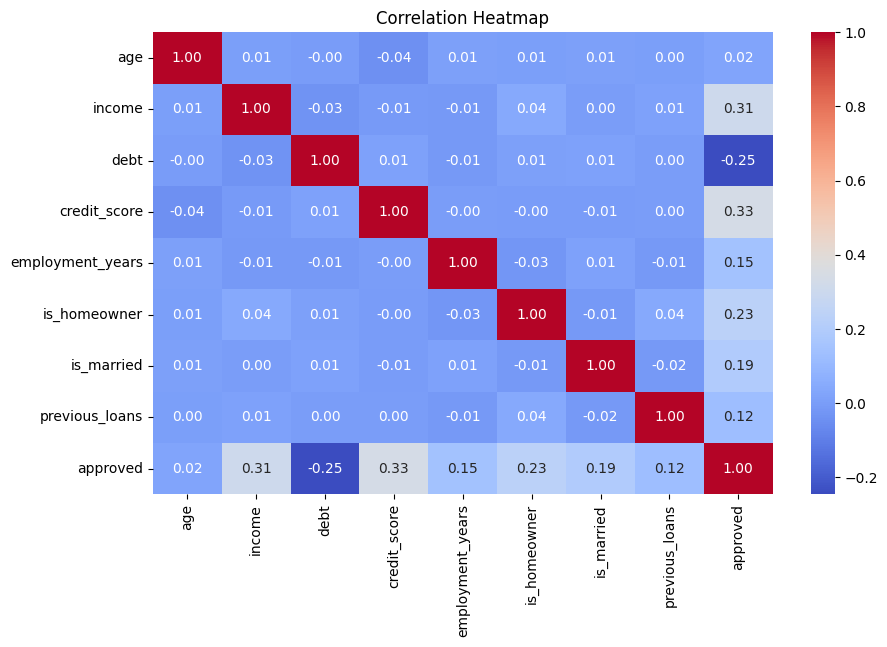

In [19]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
